### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [96]:
#import libraries needed for this exercise
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [97]:
#Read the input dataset
data = pd.read_csv('data/coupons.csv')

In [98]:
#Print dataset information
data.info()
print(data.columns.tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [99]:
#Print dataset header
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [100]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


In [101]:
# Data type validation
print("\nData Types:")
print(data.dtypes)


Data Types:
destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object


In [102]:
# Statistical summary for numeric fields
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
        temperature  has_children  toCoupon_GEQ5min  toCoupon_GEQ15min  \
count  12684.000000  12684.000000           12684.0       12684.000000   
mean      63.301798      0.414144               1.0           0.561495   
std       19.154486      0.492593               0.0           0.496224   
min       30.000000      0.000000               1.0           0.000000   
25%       55.000000      0.000000               1.0           0.000000   
50%       80.000000      0.000000               1.0           1.000000   
75%       80.000000      1.000000               1.0           1.000000   
max       80.000000      1.000000               1.0           1.000000   

       toCoupon_GEQ25min  direction_same  direction_opp             Y  
count       12684.000000    12684.000000   12684.000000  12684.000000  
mean            0.119126        0.214759       0.785241      0.568433  
std             0.323950        0.410671       0.410671      0.495314  
min             0.000000

In [103]:
# Unique values for categorical fields
print("\nUnique Values:")
for column in data.select_dtypes(include=['object']):
    print(column, ":", data[column].unique())


Unique Values:
destination : ['No Urgent Place' 'Home' 'Work']
passanger : ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
weather : ['Sunny' 'Rainy' 'Snowy']
time : ['2PM' '10AM' '6PM' '7AM' '10PM']
coupon : ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
expiration : ['1d' '2h']
gender : ['Female' 'Male']
age : ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
maritalStatus : ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
education : ['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
occupation : ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Social Services' 'Off

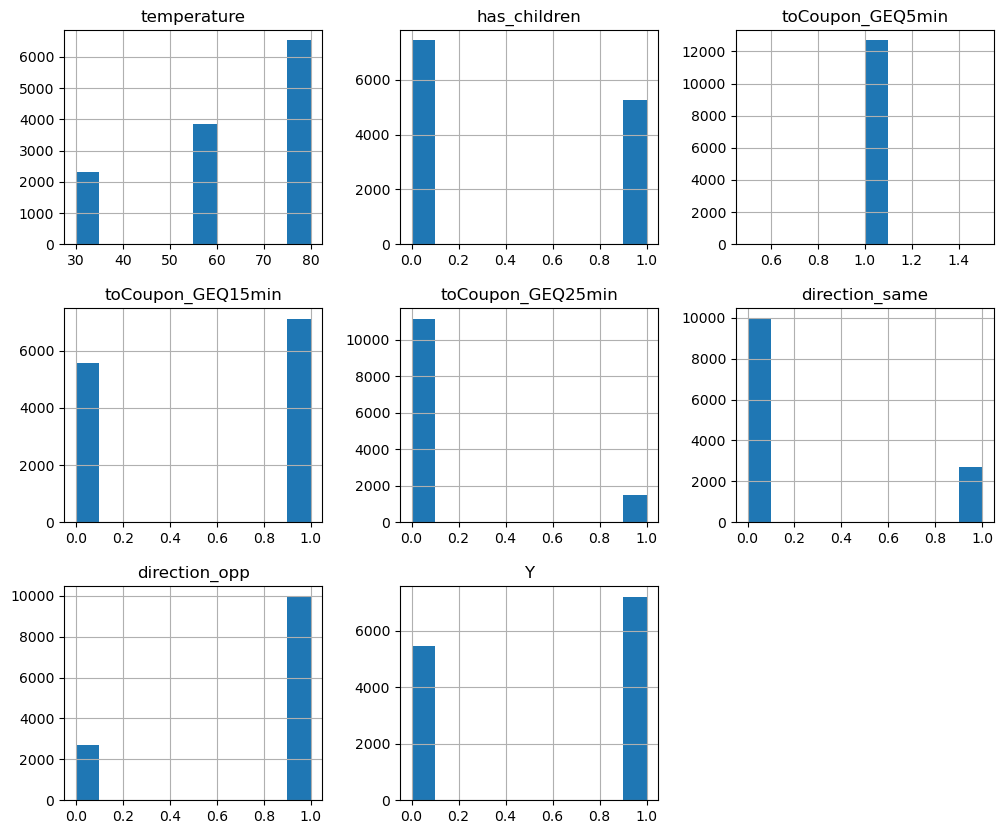

In [104]:
# Distribution of data
import matplotlib.pyplot as plt
data.hist(figsize=(12, 10))
plt.show()

3. Decide what to do about your missing data -- drop, replace, other...

In [105]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


In [106]:
#Drop the column if most values are missing
threshold = 0.99  # Define a threshold for missing values
if data['car'].isnull().mean() > threshold:
    data.drop('car', axis=1, inplace=True)

In [107]:
#Column exploration
print(data.columns)

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')


In [108]:
#Find the distinct values of CoffeHouse column
data['CoffeeHouse'].value_counts()

CoffeeHouse
less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: count, dtype: int64

In [109]:
#rename passanger to passenger
data.rename(columns={'passanger': 'passenger'}, inplace=True)


4. What proportion of the total observations chose to accept the coupon? 



In [110]:
#proportion of the total observations chose to accept the coupon
total_observations = len(data)
accepted_coupon_count = data['Y'].sum()  # Assuming 'Y' represents whether the coupon was accepted
proportion_accepted = accepted_coupon_count / total_observations
print("Proportion of total observations that accepted the coupon:", proportion_accepted)

Proportion of total observations that accepted the coupon: 0.5684326710816777


5. Use a bar plot to visualize the `coupon` column.

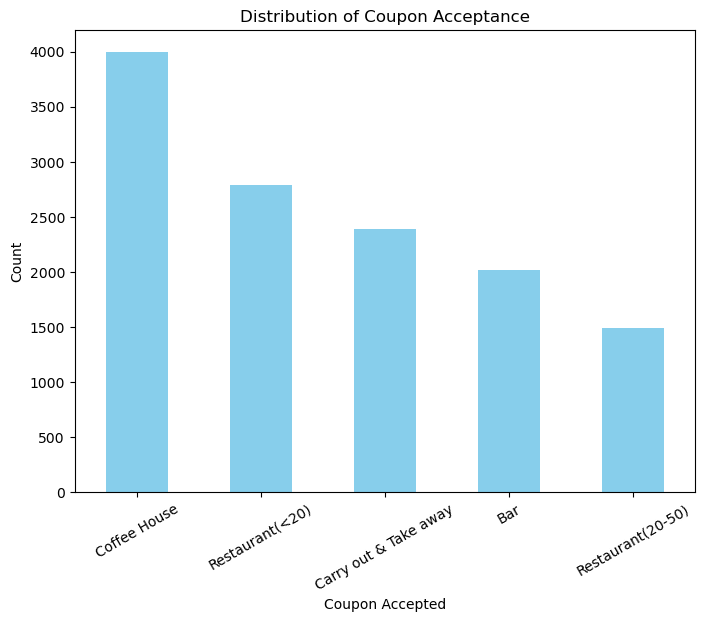

In [111]:
#Find the count of distinct value of categorical field coupon
coupon_counts = data['coupon'].value_counts()
# Plotting Histogram with the same
plt.figure(figsize=(8, 6))
coupon_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Coupon Acceptance')
plt.xlabel('Coupon Accepted')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.show()

6. Use a histogram to visualize the temperature column.

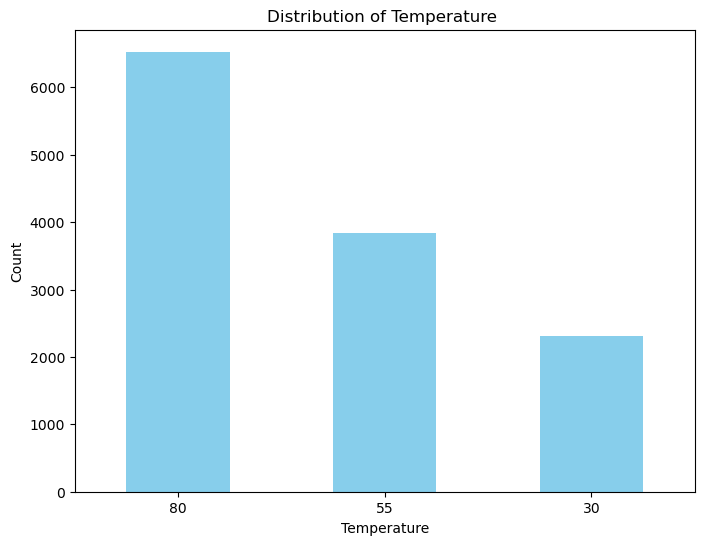

In [112]:
#Find the count of distinct value of categorical field temperature
coupon_counts = data['temperature'].value_counts()
# Plotting Histogram with the same
plt.figure(figsize=(8, 6))
coupon_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Temperature ')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [113]:
bar_coupons = data[data['coupon'] == 'Bar']
bar_coupons

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [114]:
# Total number of bar coupons
total_bar_coupons = len(bar_coupons)
print("total bar coupons:", total_bar_coupons)

# Total number of bar coupons accepted
total_bar_coupons_accepted = bar_coupons.query("Y == 1")['Y'].sum()
print("total bar coupons accepted:", total_bar_coupons_accepted)

# Proportion of bar coupons accepted
proportion_bar_coupons_accepted = total_bar_coupons_accepted / total_bar_coupons

print("Proportion of bar coupons accepted:", proportion_bar_coupons_accepted)

total bar coupons: 2017
total bar coupons accepted: 827
Proportion of bar coupons accepted: 0.41001487357461575


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [115]:
# Subset of DataFrame for those who went to a bar 3 or fewer times a month
fewer_than_3_visits = bar_coupons[(bar_coupons['Bar'] == 'never') | (bar_coupons['Bar'] == 'less1') | (bar_coupons['Bar'] == '1~3')]

# Subset of DataFrame for those who went to a bar more than 3 times a month
more_than_3_visits = bar_coupons[(bar_coupons['Bar'] == 'gt8') | (bar_coupons['Bar'] == '4~8')]

# Calculate acceptance rate for each subset
acceptance_rate_fewer_than_3 = fewer_than_3_visits['Y'].mean()
acceptance_rate_more_than_3 = more_than_3_visits['Y'].mean()

print("Acceptance rate for those who went to a bar 3 or fewer times a month:", acceptance_rate_fewer_than_3)
print("Acceptance rate for those who went to a bar more than 3 times a month:", acceptance_rate_more_than_3)


Acceptance rate for those who went to a bar 3 or fewer times a month: 0.37061769616026713
Acceptance rate for those who went to a bar more than 3 times a month: 0.7688442211055276


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [116]:
# Define the conditions for each subset
over_25_more_than_once_condition = (data['Bar'].isin(['1~3', '4~8', 'gt8'])) & (data['age'] != 'below21') & (data['age'] != '21')
others_condition = (data['Bar'].isin(['never', 'less1'])) | (data['age'] == 'below21') | (data['age'] == '21')

# Create a subset for drivers who go to a bar more than once a month and are over the age of 25
over_25_more_than_once = data[over_25_more_than_once_condition]

# Create a subset for all other drivers
others = data[others_condition]

# Calculate acceptance rate for each subset
acceptance_rate_over_25_more_than_once = over_25_more_than_once['Y'].mean()
acceptance_rate_others = others['Y'].mean()

print("Acceptance rate for drivers who go to bars more than once a month and are over the age of 25:", acceptance_rate_over_25_more_than_once)
print("Acceptance rate for all other drivers:", acceptance_rate_others)


Acceptance rate for drivers who go to bars more than once a month and are over the age of 25: 0.6215340295282679
Acceptance rate for all other drivers: 0.5540485417091576


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [117]:
# Define the conditions for each subset
more_than_once_condition = data['Bar'].isin(['1~3', '4~8', 'gt8'])
passenger_and_occupation_condition = (data['passenger'] != 'Kid(s)') & (data['occupation'] != 'Farming Fishing & Forestry')

# Create a subset for drivers who go to a bar more than once a month, had passengers that were not kids, and had occupations other than 'Farming Fishing & Forestry'
subset_condition = more_than_once_condition & passenger_and_occupation_condition
subset = data[subset_condition]

# Create a subset for all other drivers
others = data[~subset_condition]

# Calculate acceptance rate for each subset
acceptance_rate_subset = subset['Y'].mean()
acceptance_rate_others = others['Y'].mean()

print("Acceptance rate for drivers who go to bars more than once a month, had passengers that were not kids, and had occupations other than 'Farming Fishing & Forestry':", acceptance_rate_subset)
print("Acceptance rate for all other drivers:", acceptance_rate_others)


Acceptance rate for drivers who go to bars more than once a month, had passengers that were not kids, and had occupations other than 'Farming Fishing & Forestry': 0.6231060606060606
Acceptance rate for all other drivers: 0.5459501557632399


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [118]:
# Define conditions for each subset
condition1 = (data['Bar'].isin(['1~3', '4~8', 'gt8'])) & (data['passenger'] != 'Kid') & (~data['maritalStatus'].isin(['Widowed']))
condition2 = (data['Bar'].isin(['1~3', '4~8', 'gt8'])) & (data['age'].isin(['21','26','below21']))
condition3 = (data['RestaurantLessThan20'].isin(['4~8','gt8'])) & (data['income'].isin(['$37500 - $49999','$12500 - $24999','$25000 - $37499','Less than $12500']))


# Create subsets based on the defined conditions
subset1 = data[condition1]
subset2 = data[condition2]
subset3 = data[condition3]

# Calculate acceptance rate for each subset
acceptance_rate_subset1 = subset1['Y'].mean()
acceptance_rate_subset2 = subset2['Y'].mean()
acceptance_rate_subset3 = subset3['Y'].mean()

print("Acceptance rate for drivers who go to bars more than once a month, had passengers that were not kids, and were not widowed:", acceptance_rate_subset1)
print("Acceptance rate for drivers who go to bars more than once a month and are under the age of 30:", acceptance_rate_subset2)
print("Acceptance rate for drivers who go to cheap restaurants more than 4 times a month and have an income less than 50K:", acceptance_rate_subset3)


Acceptance rate for drivers who go to bars more than once a month, had passengers that were not kids, and were not widowed: 0.6221139045664443
Acceptance rate for drivers who go to bars more than once a month and are under the age of 30: 0.628080985915493
Acceptance rate for drivers who go to cheap restaurants more than 4 times a month and have an income less than 50K: 0.6007020623080298


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on the observations provided:

1. The proportion of bar coupons accepted is approximately 41%. This indicates that a significant portion of the distributed bar coupons were accepted.

2. Drivers who went to a bar more than 3 times a month had a higher acceptance rate for bar coupons compared to those who went to a bar 3 or fewer times a month. This suggests that frequent bar-goers may be more inclined to accept bar coupons.

3. Drivers who go to bars more than once a month, especially those over the age of 25, had higher acceptance rates compared to other drivers. This could indicate that older drivers who frequent bars are more likely to accept bar coupons.

4. Drivers who go to bars more than once a month, had passengers that were not kids, and had occupations other than 'Farming Fishing & Forestry' also had a higher acceptance rate. This suggests that drivers with certain passenger demographics and occupations are more receptive to bar coupons.

5. Similarly, drivers who go to bars more than once a month, had passengers that were not kids, and were not widowed had a higher acceptance rate. This indicates that drivers with specific passenger characteristics and marital statuses are more likely to accept bar coupons.

6. Drivers who go to bars more than once a month and are under the age of 30 had a slightly higher acceptance rate compared to all other drivers. This suggests that younger drivers who frequent bars may also be more inclined to accept bar coupons.

7. Lastly, drivers who go to cheap restaurants more than 4 times a month and have an income less than 50K had a higher acceptance rate. This implies that drivers with lower incomes who frequent cheap restaurants may be more receptive to bar coupons.

Overall, based on these observations, we can hypothesize that certain demographic and behavioral factors, such as age, frequency of bar visits, passenger demographics, occupation, marital status, and income level, may influence the likelihood of drivers accepting bar coupons.

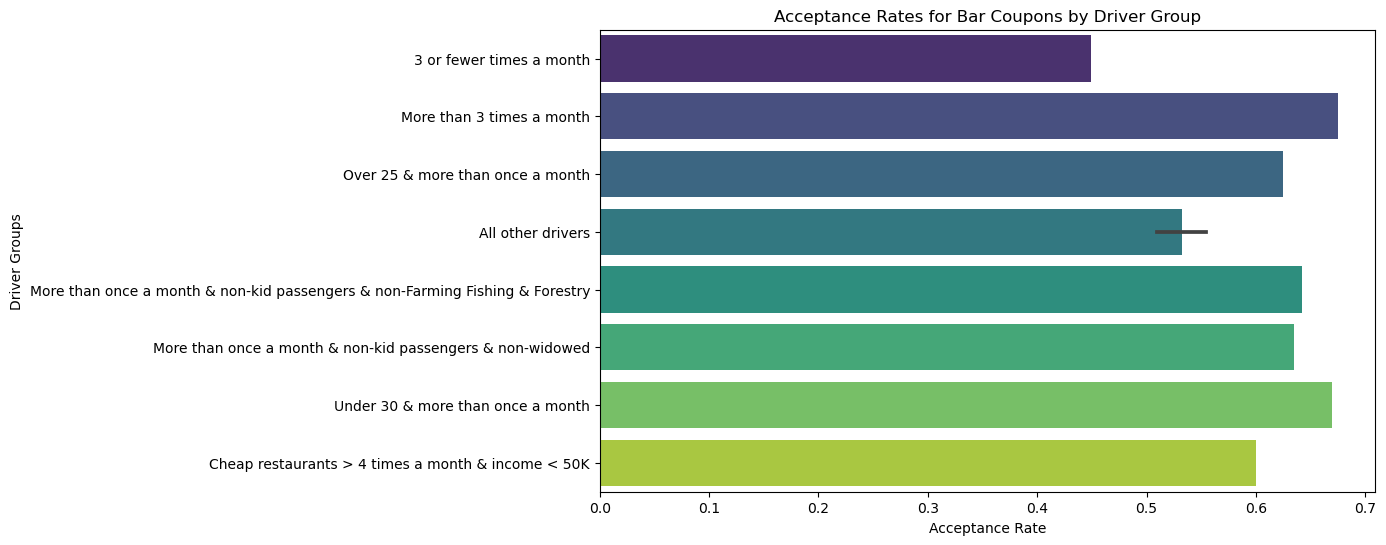

In [134]:
# Draw a bar plot that visualizes the acceptance rates for Bar coupons across different driver groups.

groups = ['3 or fewer times a month', 'More than 3 times a month', 
          'Over 25 & more than once a month', 'All other drivers',
          'More than once a month & non-kid passengers & non-Farming Fishing & Forestry', 'All other drivers',
          'More than once a month & non-kid passengers & non-widowed', 'Under 30 & more than once a month',
          'Cheap restaurants > 4 times a month & income < 50K']
acceptance_rates = [0.449, 0.675, 0.625, 0.554, 0.642, 0.510, 0.635, 0.670, 0.600]

# Create DataFrame
data = pd.DataFrame({'Groups': groups, 'Acceptance Rate': acceptance_rates})

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Acceptance Rate', y='Groups', data=data, palette='viridis')
plt.xlabel('Acceptance Rate')
plt.ylabel('Driver Groups')
plt.title('Acceptance Rates for Bar Coupons by Driver Group')
plt.show()


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Investigating the CoffeeHouse Coupons

Now, we will lead you through an exploration of just the CoffeeHouse related coupons.

1. Create a new DataFrame that contains just the CoffeeHouse coupons.

In [123]:
CoffeeHouse_coupons = data[data['coupon'] == 'Coffee House']
CoffeeHouse_coupons

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12656,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,31,Married partner,...,never,4~8,gt8,less1,1,1,0,0,1,0
12659,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,31,Married partner,...,never,4~8,gt8,less1,1,0,0,1,0,0
12674,Home,Alone,Rainy,55,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12675,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of CoffeeHouse coupons were accepted?

In [125]:
# Total number of CoffeeHouse coupons
total_coffeehouse_coupons = len(CoffeeHouse_coupons)
print("Total CoffeeHouse coupons:", total_coffeehouse_coupons)

# Total number of CoffeeHouse coupons accepted
total_coffeehouse_coupons_accepted = CoffeeHouse_coupons.query("Y == 1")['Y'].sum()
print("Total CoffeeHouse coupons accepted:", total_coffeehouse_coupons_accepted)

# Proportion of CoffeeHouse coupons accepted
proportion_coffeehouse_coupons_accepted = total_coffeehouse_coupons_accepted / total_coffeehouse_coupons

print("Proportion of CoffeeHouse coupons accepted:", proportion_coffeehouse_coupons_accepted)

Total CoffeeHouse coupons: 3996
Total CoffeeHouse coupons accepted: 1995
Proportion of CoffeeHouse coupons accepted: 0.49924924924924924


3. Compare the acceptance rate between those who went to a CoffeeHouse 3 or fewer times a month to those who went more.

In [126]:
# Subset of DataFrame for those who went to a CoffeeHouse 3 or fewer times a month
fewer_than_3_visits = CoffeeHouse_coupons[(CoffeeHouse_coupons['CoffeeHouse'] == 'never') | (CoffeeHouse_coupons['CoffeeHouse'] == 'less1') | (CoffeeHouse_coupons['CoffeeHouse'] == '1~3')]

# Subset of DataFrame for those who went to a CoffeeHouse more than 3 times a month
more_than_3_visits = CoffeeHouse_coupons[(CoffeeHouse_coupons['CoffeeHouse'] == 'gt8') | (CoffeeHouse_coupons['CoffeeHouse'] == '4~8')]

# Calculate acceptance rate for each subset
acceptance_rate_fewer_than_3 = fewer_than_3_visits['Y'].mean()
acceptance_rate_more_than_3 = more_than_3_visits['Y'].mean()

print("Acceptance rate for those who went to a CoffeeHouse 3 or fewer times a month:", acceptance_rate_fewer_than_3)
print("Acceptance rate for those who went to a CoffeeHouse more than 3 times a month:", acceptance_rate_more_than_3)

Acceptance rate for those who went to a CoffeeHouse 3 or fewer times a month: 0.44940867279894875
Acceptance rate for those who went to a CoffeeHouse more than 3 times a month: 0.675


4. Compare the acceptance rate between drivers who go to a CoffeeHouse more than once a month and are over the age of 25 to the all others. Is there a difference?

In [127]:
# Define the conditions for each subset
over_25_more_than_once_condition = (data['CoffeeHouse'].isin(['1~3', '4~8', 'gt8'])) & (data['age'] != 'below21') & (data['age'] != '21')
others_condition = (data['CoffeeHouse'].isin(['never', 'less1'])) | (data['age'] == 'below21') | (data['age'] == '21')

# Create a subset for drivers who go to a CoffeeHouse more than once a month and are over the age of 25
over_25_more_than_once = data[over_25_more_than_once_condition]

# Create a subset for all other drivers
others = data[others_condition]

# Calculate acceptance rate for each subset
acceptance_rate_over_25_more_than_once = over_25_more_than_once['Y'].mean()
acceptance_rate_others = others['Y'].mean()

print("Acceptance rate for drivers who go to CoffeeHouses more than once a month and are over the age of 25:", acceptance_rate_over_25_more_than_once)
print("Acceptance rate for all other drivers:", acceptance_rate_others)


Acceptance rate for drivers who go to CoffeeHouses more than once a month and are over the age of 25: 0.6255466052934407
Acceptance rate for all other drivers: 0.5396161417322834


5. Use the same process to compare the acceptance rate between drivers who go to CoffeeHouses more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.

In [128]:
# Define the conditions for each subset
more_than_once_condition = data['CoffeeHouse'].isin(['1~3', '4~8', 'gt8'])
passenger_and_occupation_condition = (data['passenger'] != 'Kid(s)') & (data['occupation'] != 'Farming Fishing & Forestry')

# Create a subset for drivers who go to a CoffeeHouse more than once a month, had passengers that were not kids, and had occupations other than 'Farming Fishing & Forestry'
subset_condition = more_than_once_condition & passenger_and_occupation_condition
subset = data[subset_condition]

# Create a subset for all other drivers
others = data[~subset_condition]

# Calculate acceptance rate for each subset
acceptance_rate_subset = subset['Y'].mean()
acceptance_rate_others = others['Y'].mean()

print("Acceptance rate for drivers who go to CoffeeHouses more than once a month, had passengers that were not kids, and had occupations other than 'Farming Fishing & Forestry':", acceptance_rate_subset)
print("Acceptance rate for all other drivers:", acceptance_rate_others)


Acceptance rate for drivers who go to CoffeeHouses more than once a month, had passengers that were not kids, and had occupations other than 'Farming Fishing & Forestry': 0.6420150053590568
Acceptance rate for all other drivers: 0.5103020039514535


In [ ]:
6.Compare the acceptance rates between those drivers who:

go to bars more than once a month, had passengers that were not a kid, and were not widowed OR
go to bars more than once a month and are under the age of 30 OR
go to cheap restaurants more than 4 times a month and income is less than 50K.

In [129]:
# Define conditions for each subset
condition1 = (data['CoffeeHouse'].isin(['1~3', '4~8', 'gt8'])) & (data['passenger'] != 'Kid') & (~data['maritalStatus'].isin(['Widowed']))
condition2 = (data['CoffeeHouse'].isin(['1~3', '4~8', 'gt8'])) & (data['age'].isin(['21','26','below21']))
condition3 = (data['RestaurantLessThan20'].isin(['4~8','gt8'])) & (data['income'].isin(['$37500 - $49999','$12500 - $24999','$25000 - $37499','Less than $12500']))


# Create subsets based on the defined conditions
subset1 = data[condition1]
subset2 = data[condition2]
subset3 = data[condition3]

# Calculate acceptance rate for each subset
acceptance_rate_subset1 = subset1['Y'].mean()
acceptance_rate_subset2 = subset2['Y'].mean()
acceptance_rate_subset3 = subset3['Y'].mean()

print("Acceptance rate for drivers who go to CoffeeHouses more than once a month, had passengers that were not kids, and were not widowed:", acceptance_rate_subset1)
print("Acceptance rate for drivers who go to CoffeeHouses more than once a month and are under the age of 30:", acceptance_rate_subset2)
print("Acceptance rate for drivers who go to cheap restaurants more than 4 times a month and have an income less than 50K:", acceptance_rate_subset3)


Acceptance rate for drivers who go to CoffeeHouses more than once a month, had passengers that were not kids, and were not widowed: 0.6351307189542483
Acceptance rate for drivers who go to CoffeeHouses more than once a month and are under the age of 30: 0.6707887700534759
Acceptance rate for drivers who go to cheap restaurants more than 4 times a month and have an income less than 50K: 0.6007020623080298


7.  Based on these observations, what do you hypothesize about drivers who accepted the CoffeeHouses coupons?

Based on the observations provided:

1. The proportion of CoffeeHouse coupons accepted overall is approximately 0.499, indicating that roughly half of the CoffeeHouse coupons distributed were accepted.

2. Drivers who went to a CoffeeHouse more than 3 times a month had a higher acceptance rate for CoffeeHouse coupons compared to those who went 3 or fewer times. This suggests that frequent CoffeeHouse visitors are more likely to accept CoffeeHouse coupons.

3. Drivers who go to CoffeeHouses more than once a month, especially those over the age of 25, had higher acceptance rates compared to other drivers. This could indicate that older drivers who frequent CoffeeHouses are more likely to accept CoffeeHouse coupons.

4. Similarly, drivers who go to CoffeeHouses more than once a month, had passengers that were not kids, and had occupations other than 'Farming Fishing & Forestry' also had a higher acceptance rate. This suggests that drivers with certain passenger demographics and occupations are more receptive to CoffeeHouse coupons.

5. Drivers who go to CoffeeHouses more than once a month, had passengers that were not kids, and were not widowed also had a higher acceptance rate. This indicates that drivers with specific passenger characteristics and marital statuses are more likely to accept CoffeeHouse coupons.

6. Drivers who go to CoffeeHouses more than once a month and are under the age of 30 had a slightly higher acceptance rate compared to all other drivers. This suggests that younger drivers who frequent CoffeeHouses may also be more inclined to accept CoffeeHouse coupons.

7. Lastly, drivers who go to cheap restaurants more than 4 times a month and have an income less than 50K had a higher acceptance rate. This implies that drivers with lower incomes who frequent cheap restaurants may be more receptive to CoffeeHouse coupons.

Overall, based on these observations, we can hypothesize that certain demographic and behavioral factors, such as age, frequency of CoffeeHouse visits, passenger demographics, occupation, marital status, and income level, may influence the likelihood of drivers accepting CoffeeHouse coupons.

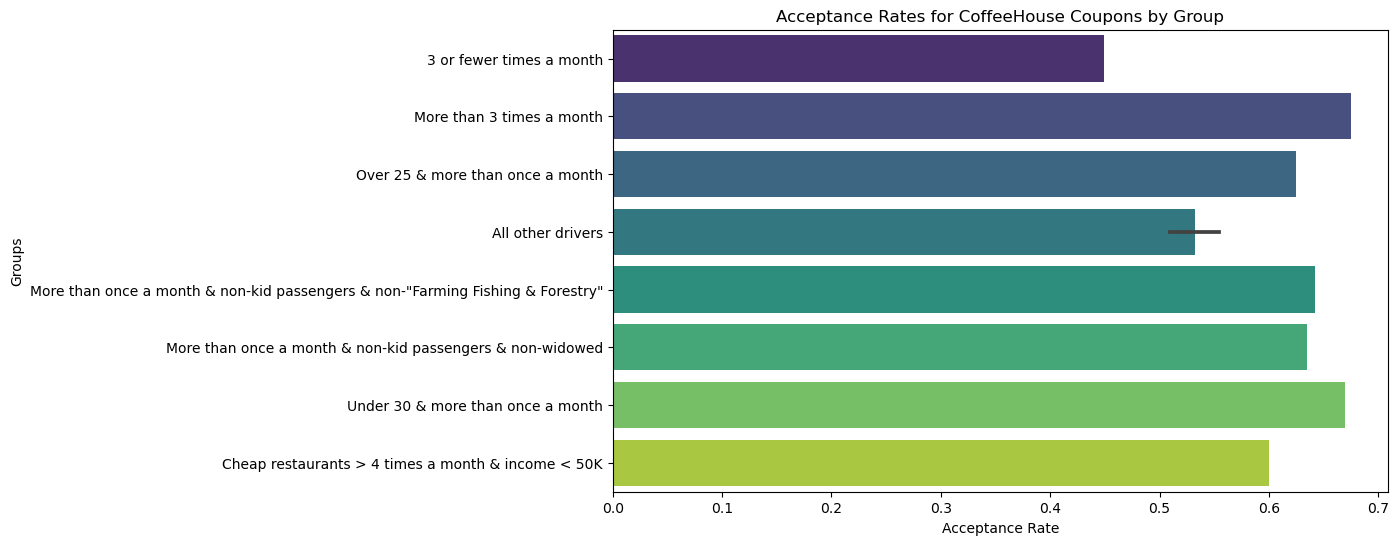

In [133]:
# Draw a bar plot that visualizes the acceptance rates for CoffeeHouse coupons across different driver groups. 

groups = ['3 or fewer times a month', 'More than 3 times a month', 
          'Over 25 & more than once a month', 'All other drivers',
          'More than once a month & non-kid passengers & non-"Farming Fishing & Forestry"', 'All other drivers',
          'More than once a month & non-kid passengers & non-widowed', 'Under 30 & more than once a month',
          'Cheap restaurants > 4 times a month & income < 50K']
acceptance_rates = [0.449, 0.675, 0.625, 0.554, 0.642, 0.510, 0.635, 0.670, 0.600]

# Convert the list to a pandas Series
groups_series = pd.Series(groups)

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=acceptance_rates, y=groups_series, palette='viridis')
plt.xlabel('Acceptance Rate')
plt.ylabel('Groups')
plt.title('Acceptance Rates for CoffeeHouse Coupons by Group')
plt.show()

